In [1]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [6]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df = iris_df[['sepal length (cm)', 'sepal width (cm)', 'target']]

In [7]:
iris_df

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [8]:
X = iris_df[['sepal length (cm)', 'sepal width (cm)']]
y = iris_df['target']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=787)

In [17]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [18]:
y_pred = lda.predict(X_test)

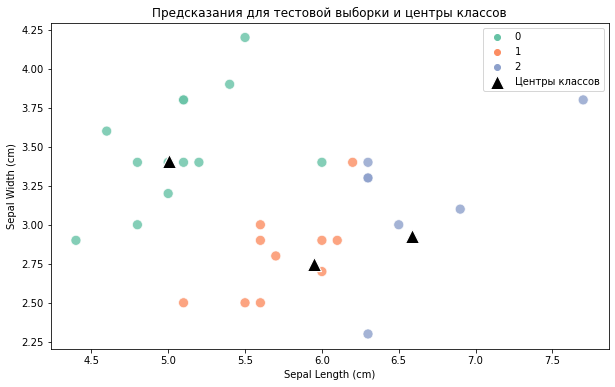

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['sepal length (cm)'], y=X_test['sepal width (cm)'], hue=y_pred, palette="Set2", s=100, alpha=0.8)
sns.scatterplot(x=lda.means_[:, 0], y=lda.means_[:, 1], marker='^', s=200, color='black', label='Центры классов')
plt.title('Предсказания для тестовой выборки и центры классов')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

In [23]:
# Посчитаем метрику accuracy для классификации
accuracy = accuracy_score(y_test, y_pred)
print(f'Метрика accuracy для LDA: {accuracy}')

# Проверим количество кластеров
unique_clusters = iris_df['cluster'].nunique()
unique_targets = iris_df['target'].nunique()

print(f'Количество кластеров: {unique_clusters}, Количество классов: {unique_targets}')

Метрика accuracy для LDA: 0.8333333333333334
Количество кластеров: 3, Количество классов: 3


In [20]:
iris_features = iris_df[['sepal length (cm)', 'sepal width (cm)']]

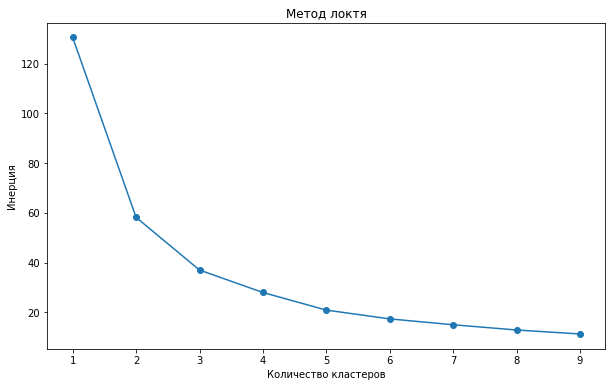

In [21]:
# Список для сохранения значений инерции
k_inertia = []

# Попробуем разное количество кластеров
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=787)
    kmeans.fit(iris_features)
    k_inertia.append(kmeans.inertia_)

# Визуализируем "локтевой" график
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.show()

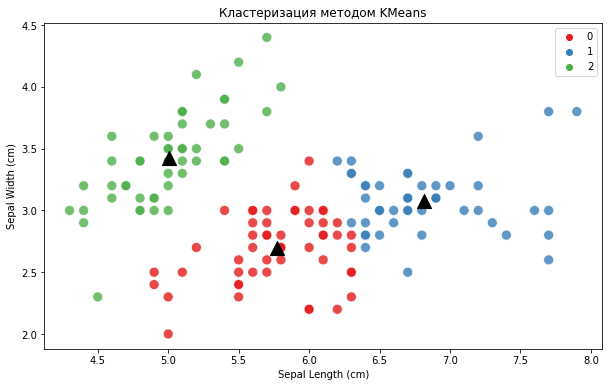

In [22]:
kmeans = KMeans(n_clusters=3, random_state=787)
kmeans.fit(iris_features)
# Добавим столбец с предсказанными кластерами в исходный датасет
iris_df['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=iris_features['sepal length (cm)'], y=iris_features['sepal width (cm)'], hue=kmeans.labels_, palette="Set1", s=100, alpha=0.8)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='^', s=200, label='Centroids')
plt.title('Кластеризация методом KMeans')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()